In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted;

# Introduction and Probability Review

Today we'll review the essentials of probability and statistics that we'll need for this course.

These are recaps of concepts you covered in DS 120 (mainly) and DS 121.

## Probability

What is probability?

We all have a general sense of what is meant by probability.

However, when we look closely, we see that there are at least two different ways to interpret the notion of "the probability of an event."

### The Frequentist View

The frequentist view of probability requires the definition of several concepts.

- _Experiment_: a situation in which the outcomes occur randomly.<br>
__Example__: Driving to work, a commuter passes through a sequence of three intersections with traffic lights. At each light she either stops $s$ or continues $c$. 
- _Sample space_:  the set of all possible outcomes of the experiment.<br>
__Example__: $\{ccc, ccs, csc, css, scc, ssc, scs, sss\},$ where $csc$, for example, denotes the outcome that the commuter continues through the first light, stops at the second light, and continues through the third light.
- _Event_: a subset of the sample space.<br>
__Example__: continuing through the first light (i.e., $\{ccc, ccs, csc, css\}$). 
<!-- - __Probability__: chance or likelihood of a particular event taking place.<br>
Example: $50\%$ probability of stopping at the first traffic light. -->

The frequentist view is summarized by this quote from the first pages of a probability textbook:

>Suppose an experiment under consideration can be repeated any number of times, so that, in principle at least, we can produce a whole series of “independent trials under identical conditions” in each of which, depending on chance, a particular event $A$ of interest either occurs or does not occur. 

>Let $n$ be the total number of experiments in the whole series of trials, and let $n(A)$ be the number of experiement in which $A$ occurs. Then the ratio $n(A)/n$ is called the relative frequency of the event $A.$ 

> It turns out that the relative frequencies observed in different series of trials are virtually the same for large $n,$ clustering about some constant $P[A],$ which is called the **probability of the event $A.$**

Y. A. Rozanov. _Probability Theory: A Concise Course._ 1969.

This is called the **frequentist** intepretation of probability.

The key idea in the above definition is to be able to:

> produce a whole series of “independent trials under identical conditions” 

Which, when you think about it, is really a rather tricky notion.

Nevertheless, the frequentist view of probability is quite useful and we will often use it in this course.

You can think of it as treating each event as a sort of idealized coin-flip.

In other words, when we use the frequentist view, we will generally be thinking of a somewhat abstract situation where we __assume__ that "independent trials under identical conditions" is a good description of the situation.

### The Bayesian View

To understand the Bayesian view of probability, consider the following situations:
    
On a visit to the doctor, we may ask, "What is the probability that I have disease X?"

Or, before digging a well, we may ask, "What is the probability that I will strike water?"

These questions are __totally incompatible__ with the notion of "independent trials under identical conditions"!

Either I do, or do not, have disease X.   Either I will, or will not, strike water.

Rather, it seems that we are really asking:
>"How certain should I be that I have disease X?" 

> "How certain should I be that I will strike water?"

In this setting, we are using probability to encode a "degree of belief" or a "state of knowledge."

This is called the __Bayesian__ interpretation of probability.

Somewhat amazingly, it turns out that whichever way we think of probability (frequentist or Bayesian),

... the __rules__ that we use for computing probabilities should be __exactly the same.__

This is a very deep and surprising thing. 

In other words, it's often really a "state of knowledge" that we are really talking about when we use probability models in this course.

> A thing appears random only through the incompleteness of our knowledge. 
>
Spinoza, _Ethics,_ Part 1

In other words, we use probability as an abstraction that __hides details__ we don't want to deal with.  

(This is a time-honored use of probability.)

>In a serious work ... an expression such as “this phenomenon is due to chance” constitutes simply, 
>an elliptic form of speech. ... It really means “everything occurs as if this phenomenon were due to chance,” 
>or, to be more precise: “To describe, or interpret or formalize this phenomenon, 
>only probabilistic models have so far given good results.”

Georges Matheron, _Estimating and Choosing: An Essay on Probability in Practice_


So it's important to recognize that both frequentist and Bayesian views are __valid__ and __useful__ views of probability.

<center>

<img src="images/Bayes-Frequentism.png" width="500px">

</center>

## What is Probability (and Statistics) Good For?

Probability is the logic of uncertainty.   In other words, when you are uncertain about something you need probability to make a decision on a rational (logical) basis.

<center>

<img src='images/Blaise_Pascal_2web.jpg' width="300px">
    
</center>

<center>
Blaise Pascal 
</center>

So you will not be surprised to know that the roots of probability were developed to analyze games of chance -- gambling.


<!-- Source: https://www.aps.org/publications/apsnews/200907/physicshistory.cfm -->

In the mid 1650s, the mathematician Blaise Pascal was considering a particular gambling game.  A friend asked him how to divide the winnings if the game ended early (before one player had completely won).   

Pascal started a correspondence with another mathematician, Pierre Fermat, exchanging letters and discussing what would be a fair way to divide the pot.   They developed the idea of listing all the possible ways the game could have gone, and dividing the winnings according to the number of outcomes in which each player wins the game.  This led to the classical frequentist notion of probability that we use today.

But it turns out that gambling is far from the only setting where we are uncertain about the facts.   Most of science consists of settings where there is some uncertainty about the facts.   In finance we are typically uncertain about the future.  In physics we are typicaly uncertain about the value of a measurement.  In political science we are uncertain about public opinion.   The lists go on and on.  Probability is a crucial tool in almost every area of human endeavor.

> The actual science of logic is conversant at present only with things either certain, impossible, or entirely doubtful, none of which (fortunately) we have to reason on.  Therefore the true logic for this world is the calculus of Probabilities, which takes account of the magnitude of the probability which is, or ought to be, in a reasonable man's mind.

James Clerk Maxwell (1850)

## Probability and Conditioning

As we've said, whether we are thinking of probability in a frequentist or a Bayesian sense, the rules that we use for manipulating probabilities are the same.

```{margin}
Photo credits: [DALL-E.](https://openai.com/product/dall-e-2) Prompt: "a jewelry store with a broken window with a gentleman wearing a mask crawling out through the broken window carrying a bag full of expensive jewelry"
```

<center>

<img src="images/DALLE-jewlery-store.png" width="400px">
    
</center>

To motivate our definitions of probability and conditioning, let's consider the following scenario.

Suppose some dark night a policeman walks down a street, apparently deserted.  Suddenly he hears a burglar alarm, looks across the street, and sees a jewelry store with a broken window.  Then a gentleman wearing a mask comes crawling out through the broken window, carrying a bag which turns out to be full of expensive jewelry.  The policeman does not hesitate at all in deciding that this gentleman is dishonest.  By what reasoning process does he arrive at this conclusion?

(From Probability Theory, E.T. Jaynes)

Clearly, it is _possible_ that the gentleman is not a thief.  The question is, what calculational rules should the policeman use to assign a probability to the idea that the gentleman is a thief?

> Probability theory is nothing but common sense reduced to calculation.

Laplace, 1819

To start with, we'll follow Pascal's idea: write down all the possibilities.  As we mentioned previously, they will form the sample space. We will denote it by $\Omega$.  

In this case $\Omega = \{\text{thief}, \text{honest}\}$.

<!-- The elements of $\Omega$ are called _outcomes_.    -->

For each member of $\Omega$ we will assign a number in the range $[0, 1]$ and call it the outcome's _probability._

We denote it with $P$, so we might say $P(\text{thief}) = 0.3.$

(or whatever).

Here we are using the __first axiom of probability__. 

_Axiom 1_: For each event $E$ of the sample space $\Omega$, $P(E)$ satisfies

$$0\leq P(E) \leq 1.$$

The second axiom tells us with probability 1, the outcome will be a point in the sample space.   

_Axiom 2_:

$$ P(\Omega) = 1.$$

The third axiom is concerned with __disjoint__ or __mutually exclusive__ events. These are events that do not co-ocur.

_Axiom 3_: If $E_1$ and $E_2$ are disjoint than the probability that $E_1$ __or__ $E_2$ occurs is equal to

$$P(E_1\cup E_2) = P(E_1)+P(E_2).$$

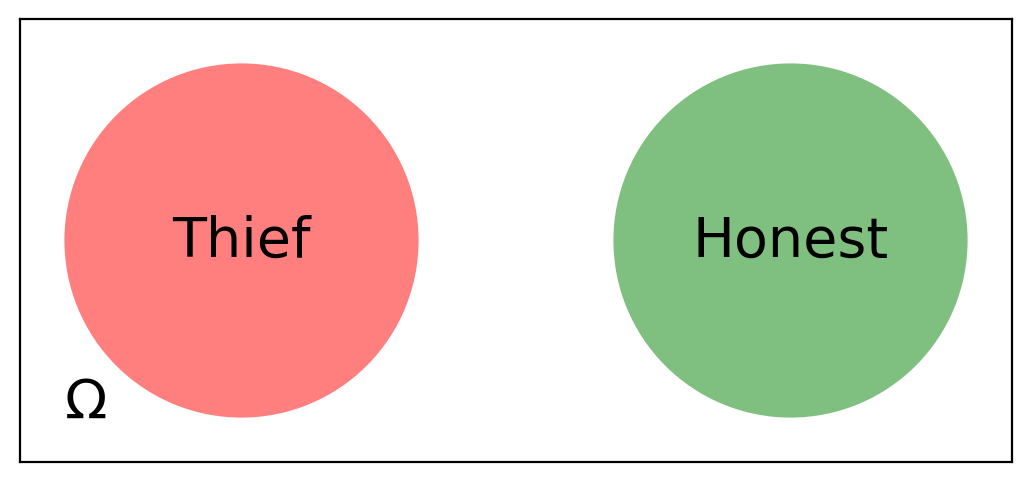

In [10]:
fig, ax = plt.subplots()
v = venn2(ax = ax, subsets={'10': 1, '01': 1, '11': 0}, 
          set_labels = None, 
          set_colors=('r', 'g'), 
          alpha = 0.5)
v.get_label_by_id('10').set_text('Thief')
v.get_label_by_id('10').set_size(20)
v.get_label_by_id('01').set_text('Honest')
v.get_label_by_id('01').set_size(20)
ax.set_axis_on()
plt.text(ax.get_xlim()[0]+0.1, ax.get_ylim()[0]+0.1, '$\Omega$', fontsize = 20);


<!-- However, if two outcomes can never both occur, then the probability that one of them occurs is the sum of their probabilities. -->

Since a person cannot be a thief and honest at the same time, from Axiom 3 it follows that

$$P(\text{thief or honest}) = P(\text{thief}) + P(\text{honest})$$

Combining this with Axiom 2 we obtain

$$ P(\text{thief}) = 1 - P(\text{honest}). $$

This is actually a well known fact about probabilities of the event $E$ and its __complement__, $\bar{E}.$

_Property A_: $P(\bar{E}) = 1 - P(E).$

Since $\emptyset = \overline{\Omega}$, this property tell us that the probability that there is no outcome at all is zero.

_Property B_: $P(\emptyset) = 0.$

Another important property in probability theory states that if the event $E$ is contained in the event $F$, then the probability of $E$ is no greater than the probability of $F$.

_Property C_: If $E$ is contained in $F$, then $P(E) \leq P(F).$

The last fundamental property tells us about the union of two events that can co-occur. 

_Property D_: $P(E \cup F) = P(E) + P(F) - P(E,F).$

### More than One Event

When we start to consider multiple events, we need calculation rules for _joint_ probabilities.

The event $A,B$ means that both $A$ __and__ $B$ are true.

So in our example we might be interested in $P(\text{thief},\text{broken window})$.

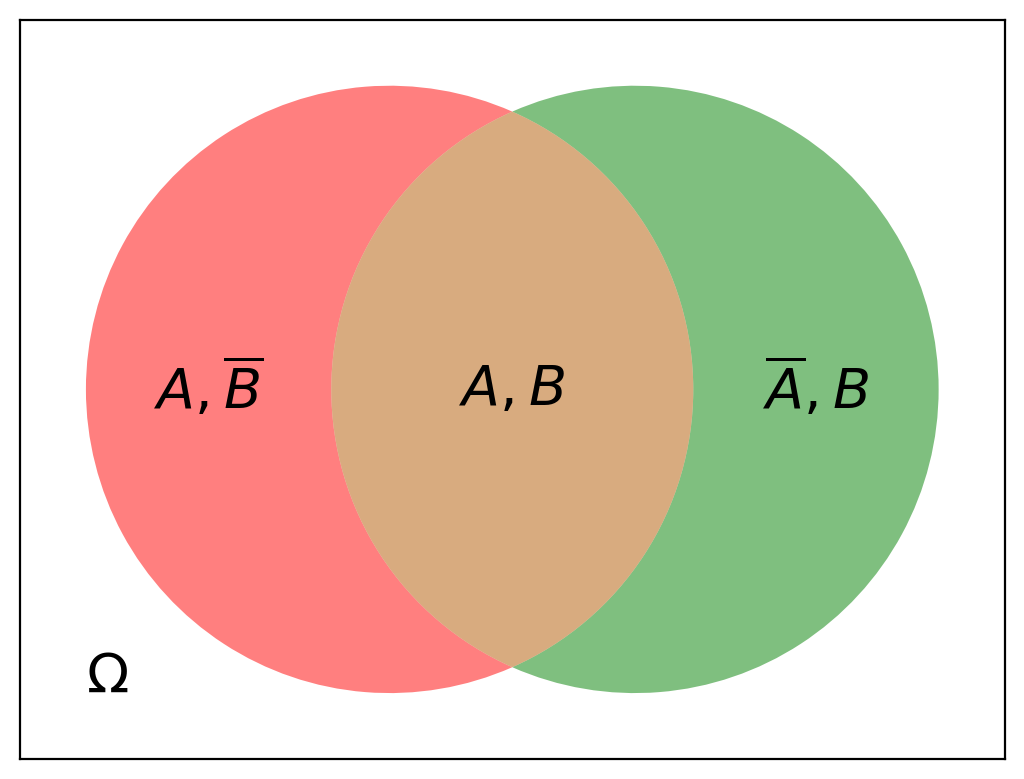

In [2]:
fig, ax = plt.subplots()
v = venn2(ax = ax, subsets={'10': 1, '01': 1, '11': 1}, 
          set_labels = None, 
          set_colors=('r', 'g'), 
          alpha = 0.5)
v.get_label_by_id('10').set_text('$A,\overline{B}$')
v.get_label_by_id('10').set_size(20)
v.get_label_by_id('01').set_text('$\overline{A},B$')
v.get_label_by_id('01').set_size(20);
v.get_label_by_id('11').set_text('$A,B$')
v.get_label_by_id('11').set_size(20)
ax.set_axis_on()
plt.text(ax.get_xlim()[0]+0.1, ax.get_ylim()[0]+0.1, '$\Omega$', fontsize = 20);

In general, there is no simple rule for how to compute $P(A, B)$.

It depends on how often the events co-occur.

### Conditional Probability

To follow the policeman's reasoning, we need to use conditional probability.  The conditional probability of $A$ given $B$, written

$$P(A | B)$$

Is the probability of event $A$ if we know that $B$ is true. 

For example, we are interested in:

$$P(\text{thief} \,\vert\, \text{carrying jewels}) $$



Intuitively, we would expect that

$$P(\text{thief} \,\vert\, \text{carrying jewels}) > P(\text{thief}) $$


And indeed the proper rule for computing this is:

$$ P(A \,\vert\, B) = \frac{P(A, B)}{P(B)} $$

We interpret this as dividing the probability that both events ($A$ and $B$) occur by the probability that the conditioning event ($B$) occurs.

Note that we have to assume that $P(B) > 0$.  The condition does not make sense otherwise.

Finally, we'll introduce the last calculational rule, which relates to _independent_ events.

We say that events $A$ and $B$ are independent if the occurrence of one does not change the probability of the other.


That is, if $A$ and $B$ are independent, then

$$P(A\,\vert\,B) = P(A)$$

or, equivalently,

$$P(B\,\vert\,A) = P(B)$$


Intuitively, the knowledge that one event has ocurred does not change our estimate of the probability of the other event.

For example, knowing the day of the week does not change our estimate of whether it will be raining or sunny.

$$P(\text{day is rainy}\,|\,\text{day is Monday}) = P(\text{day is rainy})$$

Recall that: 

$$ P(A\,\vert\,B) = \frac{P(A, B)}{P(B)} $$

and, if $A$ and $B$ are independent, then

$$ P(A\,\vert\,B) = P(A) $$


Combining those gives us:

$$ P(A\,\vert\,B) = \frac{P(A, B)}{P(B)} = P(A) $$


so

$$ P(A, B) = P(A)P(B) $$

when $A$ and $B$ are independent.

So, for example, let's say that here in Boston about 10\% of the days are rainy.    What fraction of the days of the year are rainy Mondays?

What are the two events $A$ and $B$, and what are their probabilities?

$P(A) = P(\text{day is rainy}) = 1/10$ and $P(B) = P(\text{day is Monday}) = 1/7$

What is the probabilty question we are asking?

$P(A,B) = P(\text{day is rainy } and \text{ day is Monday})$

Are the two events independent?

Yes!

Since we can assume independence, the answer is easy to compute:
    
$$P(\text{day is rainy } and \text{ day is Monday}) = P(\text{day is rainy})P(\text{day is Monday})$$



$$P(\text{day is rainy } and \text{ day is Monday}) = \frac{1}{10} \cdot \frac{1}{7} = \frac{1}{70}.$$

So we expect about 365 / 70 = about 5 rainy Mondays per year.

### Chain Rule

Recall again the definition of conditional probability:

$$ P(A\,\vert\,B) = \frac{P(A, B)}{P(B)}. $$


By rearranging terms, we can see that:

$$ P(A, B) = P(A \,\vert\, B)\; P(B). $$


This is called the __chain rule__ of conditional probabilities.

We can extend this pattern to as many random variables as we want.  For example:

$$ P(A, B, C) = P(A \,\vert\, B,C) \;P(B \,\vert\, C) \; P(C). $$


And this gives us the tools we need to write out a mathematical representation of the policeman's logic!

The chain rule tells us that:

$\begin{equation}
P(\text{Thief, Jewlery, Crawling, Mask, Broken Window, Alarm}) =  \\ P(\text{Thief} \,\vert\, \text{Jewlery, Crawling, Mask, Broken Window, Alarm}) \;P(\text{Jewlery} \,\vert\, ...) ... P(\text{Alarm}) 
\end{equation}$

And we want to calculate:

$$ P(\text{Thief} \,\vert\, \text{Jewlery, Crawling, Mask, Broken Window, Alarm}) $$
 
Which we can get to by moving around some terms.

### Law of Total Probability

Another useful tool for computing probabilities is provided by the following law. 

Let $B_1$ and $B_2$ form the complete sample space $S$ and be disjoint $\left(B_1 \cap B_2 = \emptyset\right)$, with $P(B_1) > 0$ and $P(B_2) > 0$. Then for any event $A$,

   $$P(A) = P(A|B_1)P(B_1)+P(A|B_2)P(B_2).$$

### Bayes' Rule

Another direct consequence of the definition of conditional probability is __Bayes' Rule__:
    
$$ P(A \,\vert\, B) = \frac{P(B\,\vert\,A) \; P(A)}{P(B)}. $$

We won't focus on it too much now, but we will use Bayes Rule __a lot__ in this course, and we will discuss it more in upcoming lectures. The key insight, as we will see, is that we can use observations of $B$ to update out belief in $A$.

For now, think about how you might derive this rule from the rules we have learned so far.

## Random Variables

Often we'll be considering events that have certain kinds of values as their outcomes.

When a random event has an associated numeric value, or a set of specific values, we refer to it as a __random variable.__

Notationally, we use CAPITAL LETTERS for random variables and lowercase for non-random quantities.

We will distinguish between _categorical_ random variables and _numerical_ random variables.

### Categorical Random Variables

In the case of the policeman, he may formulate a categorical random variable $G$ to describe the gentleman.   To specify the distribution of $G$, the policeman might decide:

$$ P(G = \text{thief}) = 0.3 $$

which would mean therefore that 

$$ P(G = \text{honest}) = 0.7 $$

As another example, consider a traffic light that may be red, green, or yellow.  We could describe it as a categorical random variable, corresponding to what we see when we observe it at a random time.

If we denote this random variable as $X$, we might find the following:

| color | P(X = color) |
| ----| -----------|
| red | 0.4 |
| green | 0.4 |
| yellow | 0.2 |


Thus, to specify the distribution for a categorical random variable,  conceptually we __construct a table__ showing the probabilities of all of the possible values of the random variable.

### Numerical Random Variables

In contrast, a numerical random variable takes on numbers as values.

We distinguish between discrete and continuous random variables. 

A _discrete random variable_ is a random variable that can take on
only a finite or at most a countably infinite number of values. <br>
__Example__: the number of points showing after a roll of a die. 

A _continuous random variable_ is a random variable that can take
on any value from a given range. That is, a continuous random variable has an uncountable set of possible outcomes.<br>
__Example__: the lifetime of a light bulb.

To specify the distribution for a numerical random variable, we need some more definitions.

The _probability mass function_ (PMF) $p$ is formed by the probabilities assigned to the possible values of a discrete random variable. That is, 

$$p(a) = P(X=a).$$

An analogous function for a continuous random variable is called the _probability density function_ (PDF) and is usually denoted by $f$.

The _cumulative distribution function_ (CDF) $F$ for a random
 variable $X$ is equal to the probability measure for the event that
 consists of all possible outcomes with a value of the random variable $X$
 less than or equal to $a$. That is, 
 
 $$F(a) = P(X \leq a).$$

__Example.__  Consider the roll of a single die.  The random variable here is the number of points showing.  What is the CDF of this discrete random variable?

<center>
    
<img src="images/single-die.png" alt="Die" width="100px">
    
</center>

We don't have any reason for thinking that one outcome is more likely than another, so we assign equal probabilities to each outcome $\Omega = \{1, 2, 3, 4, 5, 6\}$.  Then the CDF is:

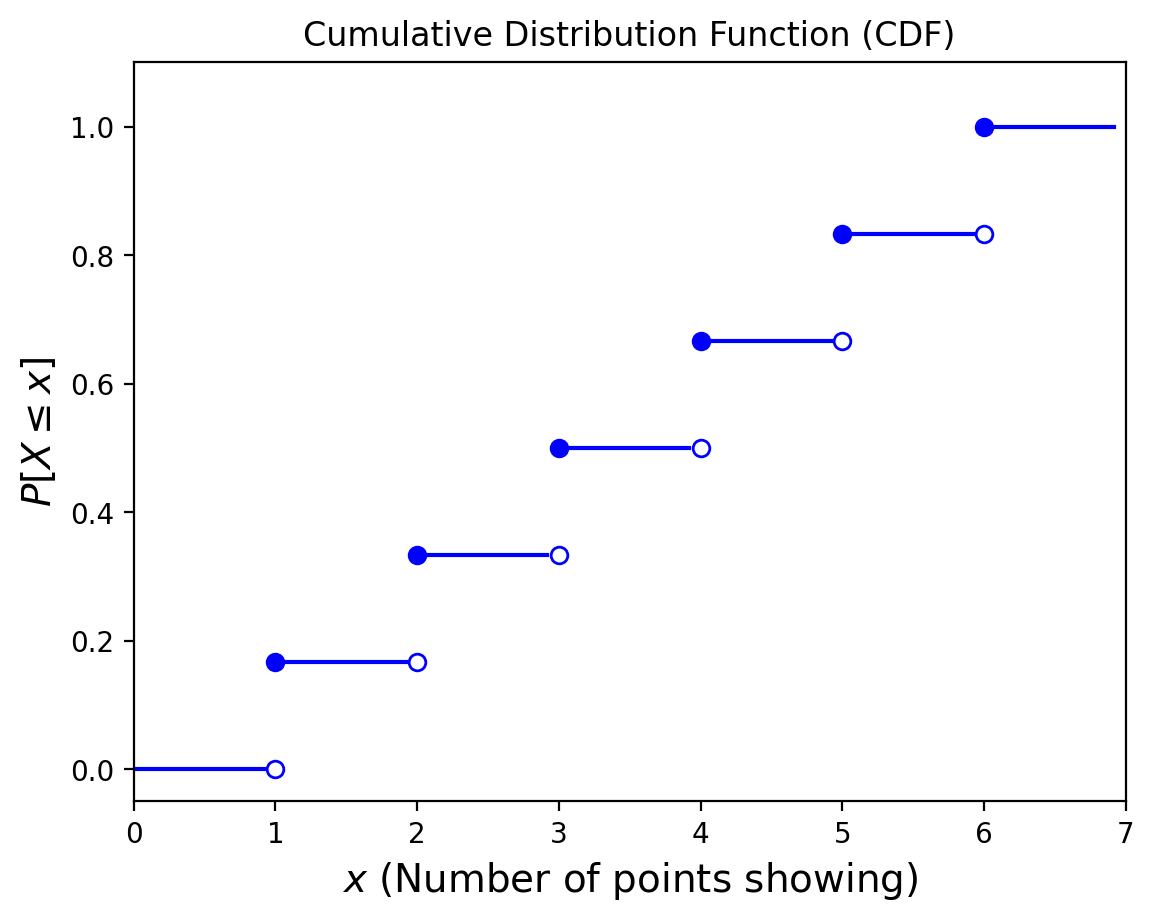

In [4]:
plt.figure()
for i in range(7):
    plt.plot([i, i+1-.08], [i/6, i/6],'-b')
for i in range(1, 7):
    plt.plot(i, i/6, 'ob')
    plt.plot(i, (i-1)/6, 'ob', fillstyle = 'none')
plt.xlim([0, 7])
plt.ylim([-0.05, 1.1])
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel(r'$x$ (Number of points showing)', size=14)
plt.ylabel(r'$P[X\leq x]$', size=14);

Now, consider this CDF of some continuous random variable:

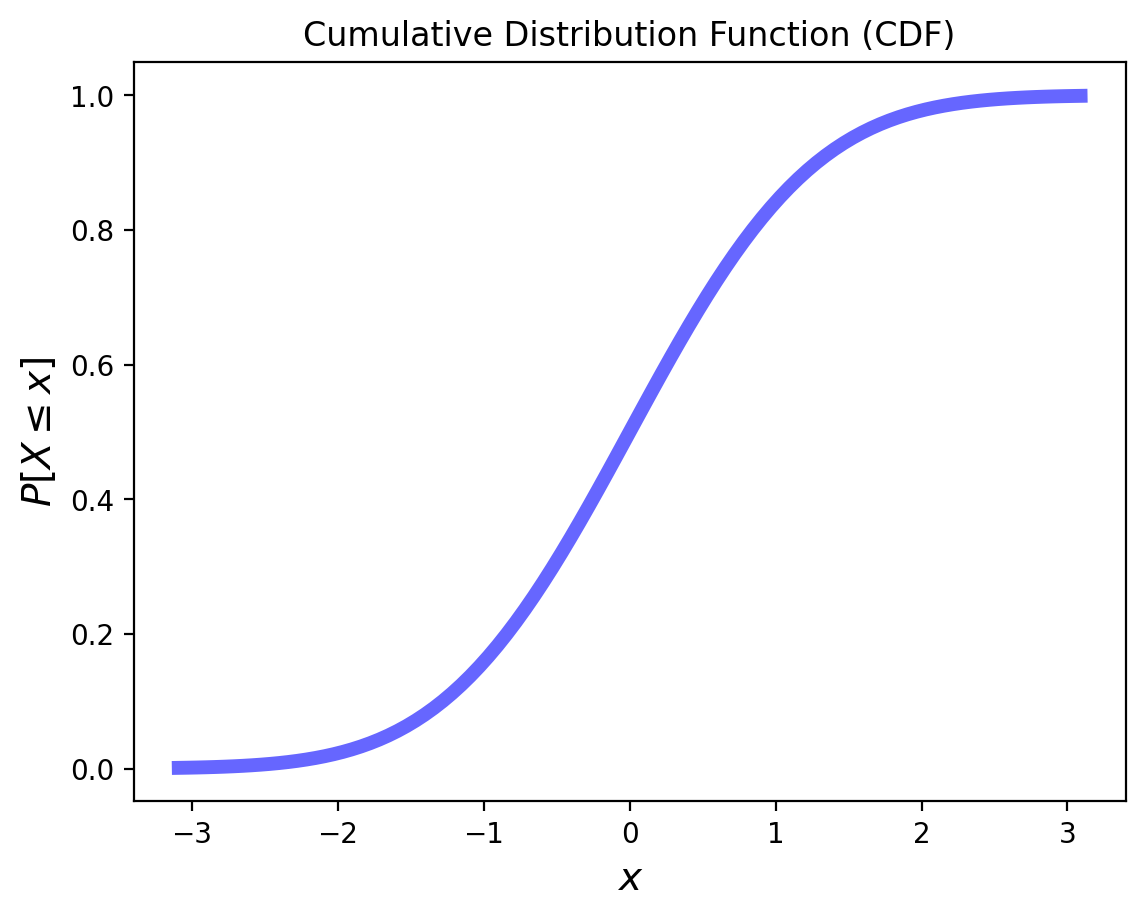

In [5]:
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.cdf(x),'b-', lw=5, alpha = 0.6)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel(r'$x$', size=14)
plt.ylabel(r'$P[X\leq x]$', size=14);

What does it mean when the slope is steeper for some $x$ values?

The slope tells us how likely values are in a particular range.

This is captured by the corresponding probability density function.  

It should be noted that the probability density function of a continuous random variable is formally defined as the derivative (recall that the derivative is the slope of a function at any given point) of the CDF, when that is defined.

$$ f(x) = \frac{dF(x)}{dx}.$$

Often we will go the other way as well to get the CDF from the PDF:

$$ F(a) = \int_{-\infty}^{a} f(x)\; dx. $$

The integral notation here isn't crucial at this moment, but be aware that the integral is the reverse of a derivative, so this is saying intuitively that if we sum the area under the PDF, we get the CDF.

For simplicity, let us return to a discrete random variable with probability mass function $p$. The corresponding CDF can be written as

$$ F(a) = P(X \leq a) = \sum_{x\leq a} p(x). $$


You should be able to see that:

$$ \sum_{i=-\infty}^{+\infty} p(x_i)\; = 1 $$

and

$$      p(x) \geq 0. $$

All this is to say: probabilities must sum to 1 and be greater than 0.

Note that for a discrete random variable, the CDF is not differentiable (because the CDF is a step function).  

For the PMF we simply plot the probability function of
each value.  That is, we plot $P[X = a]$ for the various values of $a$.

Another way to think of the PMF is that it consists of impulses at the
points of discontinuity of the CDF. 

For our example of the single die:

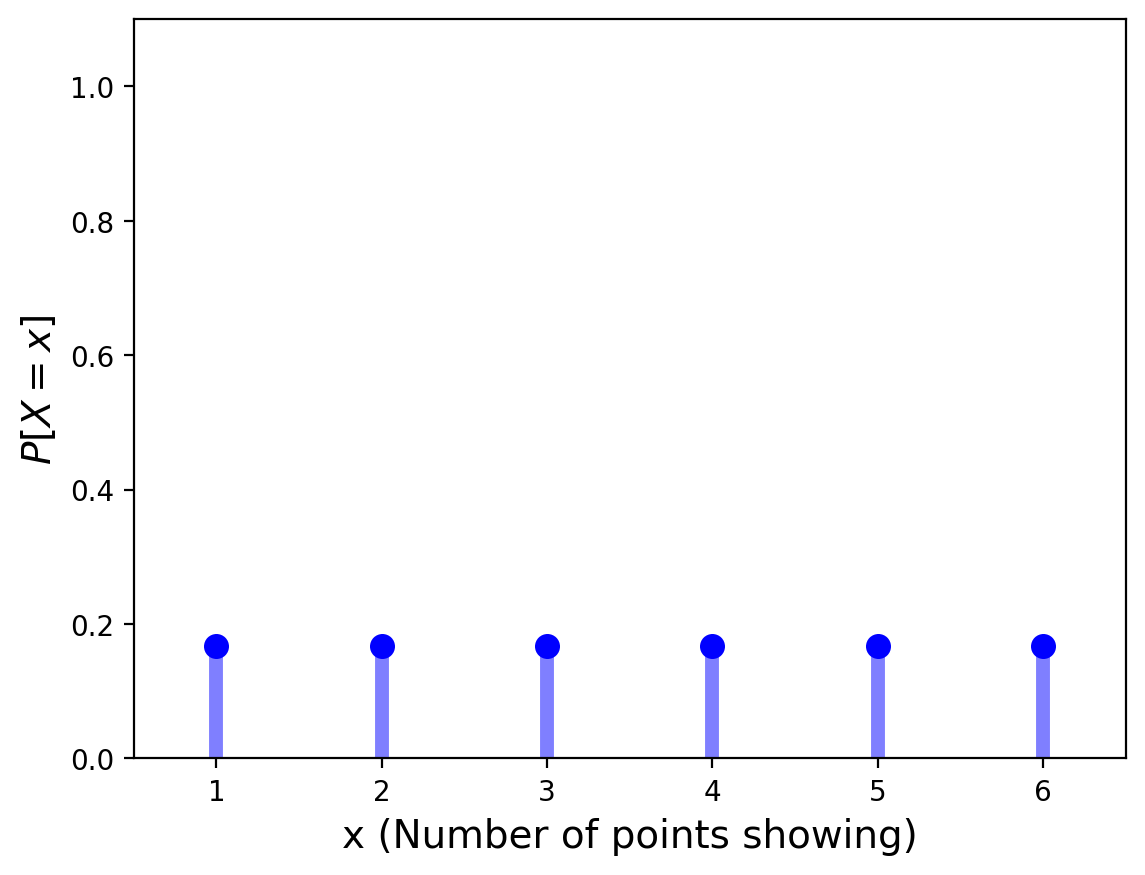

In [6]:
plt.figure()
x = np.arange(1, 7)
plt.plot(x, 6*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([0.5, 6.5])
plt.ylim([0, 1.1])
plt.xlabel(r'x (Number of points showing)', size=14)
plt.ylabel(r'$P[X = x]$', size=14);

## Characterizing Random Variables

We now present some ways of describing the distribution of a random variable.

### Expected Value

__Definition.__ The _expected value_ $E[X]$ of a random
variable $X$ is the probability-weighted sum or integral of all possible values of $X$.  

For a discrete random variable, this is:

$$ E[X] \equiv \sum_{x=-\infty}^{+\infty} x\cdot  P(X=x) = \sum_{x=-\infty}^{+\infty} x\cdot  p(x) $$

and for a continuous random variable with PDF $f$:

$$ E[X] \equiv \int_{-\infty}^{+\infty} x\cdot f(x)\; dx. $$

The expected value tells us what to expect from the average of many observations of the random variable.

It does __not__ tell us what to expect from a single observation.

For example, if $X$ is the roll of a six-sided die, what is the expected value of a die roll?


$$ E[X] = \sum_{x=1}^{6} P[X=x] \cdot x $$


so

$$ E[X] = P[X=1] \cdot 1 + P[X=2] \cdot 2 + P[X=3] \cdot 3 + P[X=4] \cdot 4 + P[X=5] \cdot 5 + P[X=6] \cdot 6$$


so

$$ E[X] = 1/6 \cdot (1 + 2 + 3 + 4 + 5 + 6) = 3.5 $$


But 3.5 is a value that can __never occur__ for a roll of the die!

The extreme version of this phenomenon is the person
with their head in the oven and feet in the freezer who claims "on
average I feel fine." 

### Variance

The variability of random quantities is crucially important to characterize!

For this we use __variance,__ the mean squared difference of the random variable from its mean.

__Definition.__ The variance of a random variable $X$ is

$$ \text{Var} (X) \equiv E[(X - \overline{X})^2]. $$

Where we use the notation $\overline{X}$ to mean $E[X]$.

For example, given a discrete R.V. with $E[X] = \mu$ this would be:

$$ \text{Var} (X) = \sum_{x=-\infty}^{+\infty} (x-\mu)^2\; P(X=x) = \sum_{x=-\infty}^{+\infty} (x-\mu)^2\; p(x). $$

We use the symbol $\sigma^2$ to denote variance.

Let's look at dice again, if $X$ is the roll of a six-sided die, what is the variance of a die roll?

We already know the expected value (or mean) is 3.5:

$$ \text{Var} (X) = \sum_{x=1}^{6} (x-3.5)^2\; P(X=x). $$

$$ \text{Var} (X) = 1/6\sum_{x=1}^{6} (x-3.5)^2\; = 35/12.$$

What should be relatively clear from this is that random variables with the same mean can have vastly different variances.

How could we change our die to achieve this?

In [7]:
import numpy as np

# Outcomes
outcomes = np.array([1, 2, 3, 4, 5, 6])

# Probabilities
probabilities = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

# Expected Value
mean = np.sum(outcomes * probabilities)
print("Expected value: ", mean)

# Variance
variance = np.sum((outcomes-mean)**2 * probabilities)
print("Variance: ",variance)

Expected value:  3.5
Variance:  2.9166666666666665


```{margin}
DataSaurus comes from AutoDesk Research: "Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing"
```

One more note on variance: the units of variance are the square of the units of the mean. 

So to compare variance and mean in the same units, we take the square root of the variance.

This is called the __standard deviation__ and is denoted $\sigma$.

### Mean and standard deviation are often not enough!

The famous DataSaurus shows us why:

<center>
    
<img src="images/DataSaurus.gif" alt="Die" width="800px">
    
</center>

Often we will need the entire distribution of the data to be able to reason about it.